In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct
from scipy.linalg import eig
from scipy.integrate import solve_ivp

# Datos del sistema
R = 2.27
L = 0.0047
Km = 0.25
Kb = 0.25
B = 0.003026
J = 0.00246
A = [[-R/L,-Kb/L],[Km/J,-B/J]]
polos = eig(A)
print(polos)

(array([-471.48356309+0.j,  -12.72524162+0.j]), array([[-0.9774358 ,  0.11239564],
       [ 0.21123269, -0.99366353]]))


In [3]:
T = [] # Almacenar los tiempos que llaman a f
TL = []
V = [] # Almacenar los valores de V durante el llamdo a f
# Funcion de ecaucione diferencial
def f(t,x):
    i = x[0]
    w = x[1]
    if t<0.1:
        v = 0
    else:
        v = 12
    if t<0.5:
        Tl = 0
    else:
        Tl = 0.5
    V.append(v)
    TL.append(Tl) 
    T.append(t)
    f1 = -R/L*i-Kb/L*w + 1/L*v
    f2 = Km/J*i-B/J*w-1/J*Tl
    return [f1,f2]
# solución de la ecuación diferencial
resultado = solve_ivp(f,[0,1],[0,0])
# Tensión y carga
Vin = []
Tl = []
IDX = []
for k in resultado.t:
    for j in range(len(V)):
        if k == T[j]:
            idx = j
    Vin.append(V[idx])
    Tl.append(TL[idx])

(40.0, 45.0)

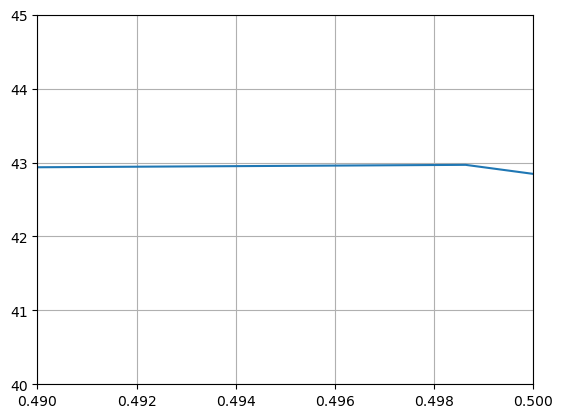

In [4]:
plt.plot(resultado.t,resultado.y[1])
plt.plot(resultado.t,Vin)
plt.plot(resultado.t,Tl)
plt.grid()
plt.xlim(0.49,0.5)
plt.ylim(40,45)

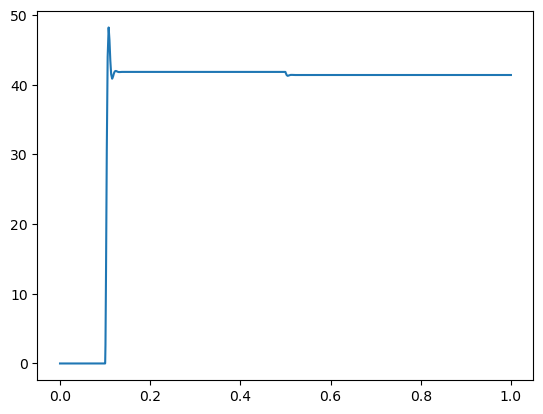

In [5]:
T = [] # Almacenar los tiempos que llaman a f
TL = []
V = [] # Almacenar los valores de V durante el llamdo a f
E = []
WR = []
K = 10 # valor del controlador
# Funcion de ecaucione diferencial
def f(t,x):
    i = x[0]
    w = x[1]

    # Entrada
    if t<0.1:
        wr = 0
    else:
        wr = 43
    if t<0.5:
        Tl = 0
    else:
        Tl = 0.5
    # Tensión
    error = wr - w
    v = K*(error)
    V.append(v)
    TL.append(Tl) 
    T.append(t)
    E.append(error)
    WR.append(wr)
    f1 = -R/L*i-Kb/L*w + 1/L*v
    f2 = Km/J*i-B/J*w-1/J*Tl
    return [f1,f2]
# solución de la ecuación diferencial
resultado = solve_ivp(f,[0,1],[0,0])
# Tensión y carga
Vin = []
Tl = []
IDX = []
for k in resultado.t:
    for j in range(len(V)):
        if k == T[j]:
            idx = j
    Vin.append(V[idx])
    Tl.append(TL[idx])


plt.plot(resultado.t,resultado.y[1])



In [6]:
T

[0.0,
 1e-06,
 2e-07,
 3e-07,
 8e-07,
 8.888888888888888e-07,
 1e-06,
 1e-06,
 3e-06,
 4e-06,
 9e-06,
 9.888888888888889e-06,
 1.1e-05,
 1.1e-05,
 3.0999999999999995e-05,
 4.0999999999999994e-05,
 9.099999999999999e-05,
 9.988888888888888e-05,
 0.00011099999999999999,
 0.00011099999999999999,
 0.00031099999999999997,
 0.00041099999999999996,
 0.000911,
 0.0009998888888888887,
 0.001111,
 0.001111,
 0.0031109999999999996,
 0.004111,
 0.009110999999999998,
 0.009999888888888888,
 0.011111,
 0.011111,
 0.031110999999999996,
 0.041110999999999995,
 0.09111099999999998,
 0.09999988888888886,
 0.11111099999999997,
 0.11111099999999997,
 0.015111,
 0.017110999999999998,
 0.027110999999999996,
 0.028888777777777774,
 0.031110999999999996,
 0.031110999999999996,
 0.035110999999999996,
 0.03711099999999999,
 0.04711099999999999,
 0.04888877777777777,
 0.05111099999999999,
 0.05111099999999999,
 0.09111099999999997,
 0.11111099999999996,
 0.21111099999999994,
 0.2288887777777777,
 0.2511109999999

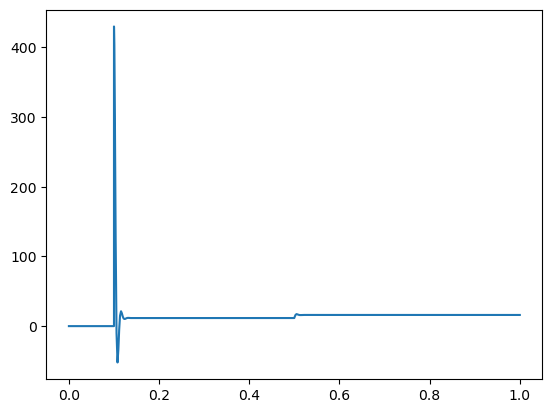

In [7]:

plt.plot(resultado.t,Vin)

In [8]:
# Lugar de las raíces
Gp = ct.tf([Km/J/L],[1,R/L,Kb*Km/J/L])
Gp.poles()
r,k = ct.rlocus(Gp,plot=False)

In [13]:
#Factor de amortiguamiento
np.savetxt('polos.txt',r)

In [15]:
a = open('polos.txt').read()

In [17]:
type(a)

str

In [7]:
import numpy as np
y = np.array([1,2,3,4,5])
x = np.array([1.1,2,2.9,4,5])
print(np.mean((y-x)**2))
print(np.sum((y-x)**2)/5)

0.004000000000000007
0.004000000000000007
